In [1]:
pip install scikit-learn-extra

     |████████████████████████████████| 624kB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=342076 sha256=14d7cbca2c0dce2718d00e1caaaf21e3329de351ca98c1271d9fd3f0222c8f51
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/My Drive/AI_Datasets/Mall_Customers.csv')
df.shape

(200, 5)

In [4]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [0]:
df = df.iloc[:,[2,4]].values

In [0]:
WCSS = []

for i in range(1,15):
  Kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=100)
  Kmeans.fit(df)
  WCSS.append(Kmeans.inertia_)


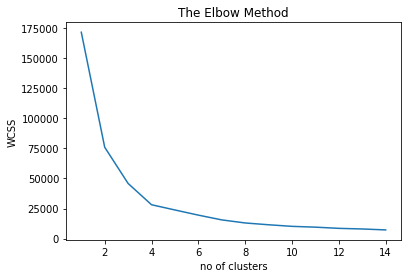

In [8]:
plt.plot(range(1,15), WCSS)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(df)


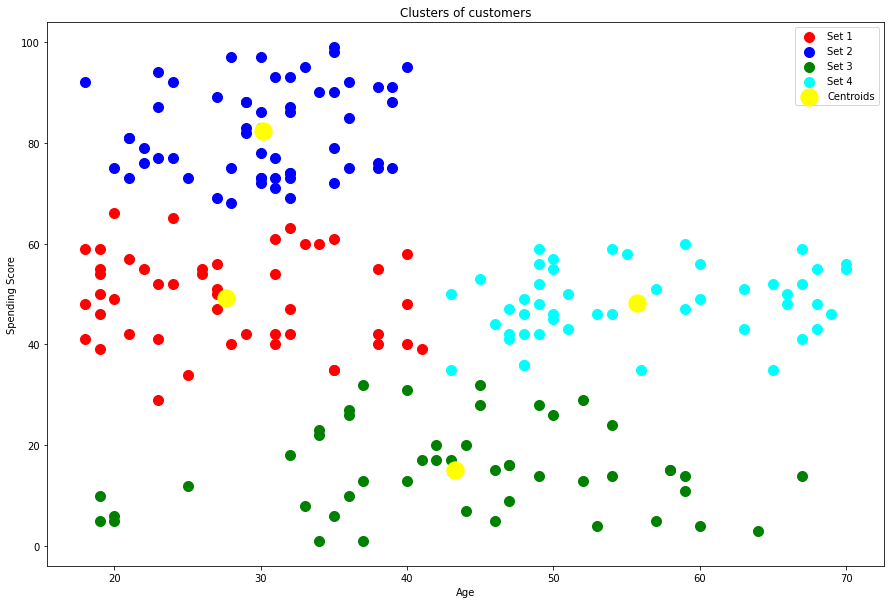

In [10]:
plt.figure(figsize = (15, 10))
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Set 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Set 2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Set 3')
plt.scatter(df[y_kmeans == 3, 0], df[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Set 4')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [11]:
print(kmeansmodel.cluster_centers_)
print(kmeansmodel.inertia_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]
28165.58356662934


In [0]:
kmeanmodel2 = KMedoids(n_clusters=4,init='k-medoids++',random_state=0)
y_kmeans2 = kmeanmodel2.fit_predict(df)

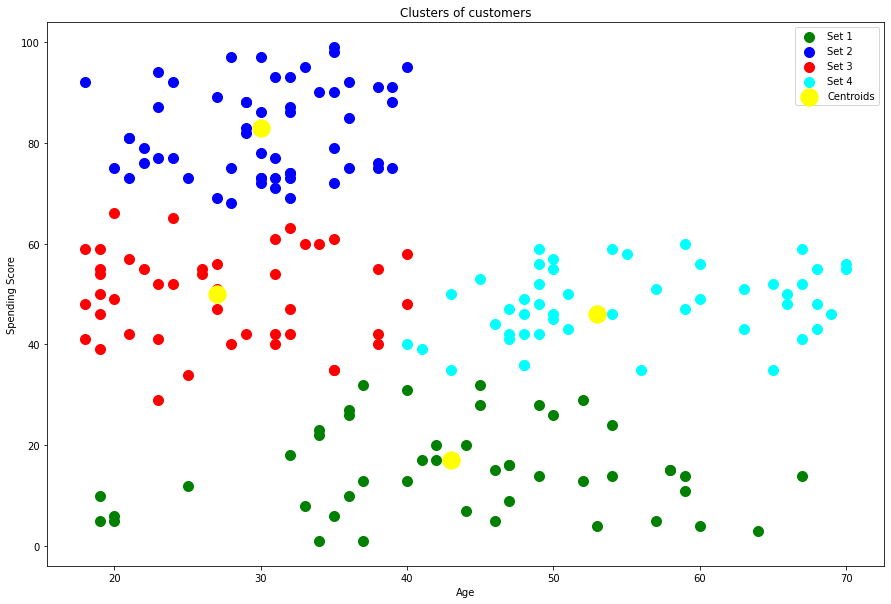

In [13]:
plt.figure(figsize = (15, 10))
plt.scatter(df[y_kmeans2 == 0, 0], df[y_kmeans2 == 0, 1], s = 100, c = 'green', label = 'Set 1')
plt.scatter(df[y_kmeans2 == 1, 0], df[y_kmeans2 == 1, 1], s = 100, c = 'blue', label = 'Set 2')
plt.scatter(df[y_kmeans2 == 2, 0], df[y_kmeans2 == 2, 1], s = 100, c = 'red', label = 'Set 3')
plt.scatter(df[y_kmeans2 == 3, 0], df[y_kmeans2 == 3, 1], s = 100, c = 'cyan', label = 'Set 4')
plt.scatter(kmeanmodel2.cluster_centers_[:, 0], kmeanmodel2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [14]:
print(kmeanmodel2.cluster_centers_)
print(kmeanmodel2.inertia_)

[[43 17]
 [30 83]
 [27 50]
 [53 46]]
2160.903925055179


In [0]:
from sklearn.cluster import AgglomerativeClustering 

In [0]:
kmeansmodel3 = AgglomerativeClustering(n_clusters=4,linkage='ward',affinity='euclidean')
y_kmeans3 = kmeansmodel3.fit(df)
Labels = kmeansmodel3.labels_


No handles with labels found to put in legend.


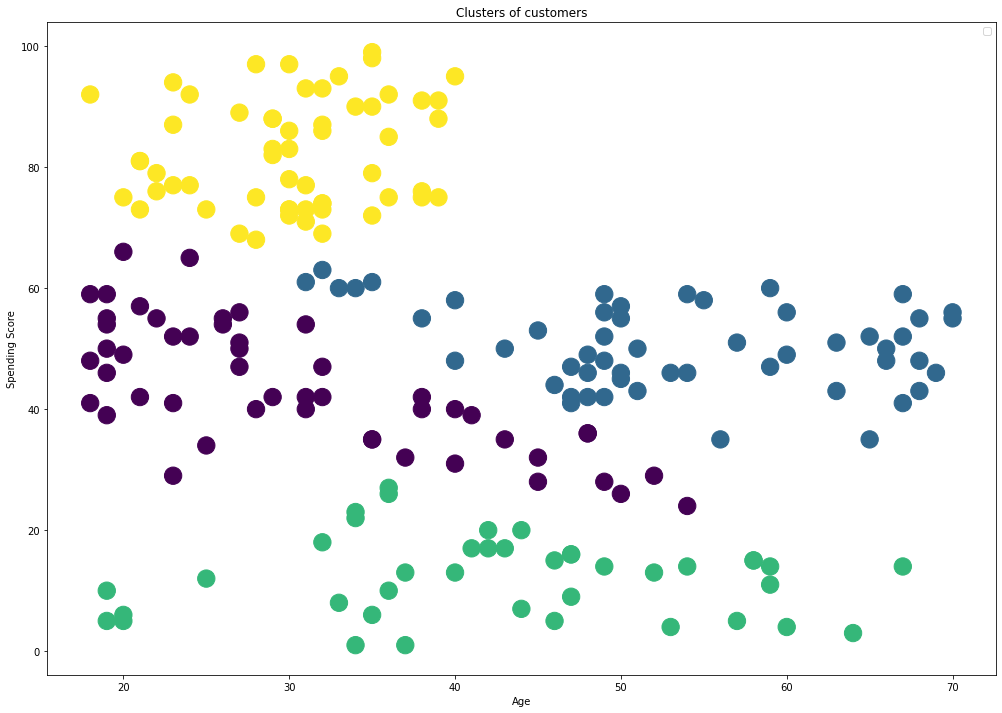

In [17]:
plt.figure(figsize = (17, 12))
plt.scatter(df[:,0], df[:,1], s = 300, c = Labels)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

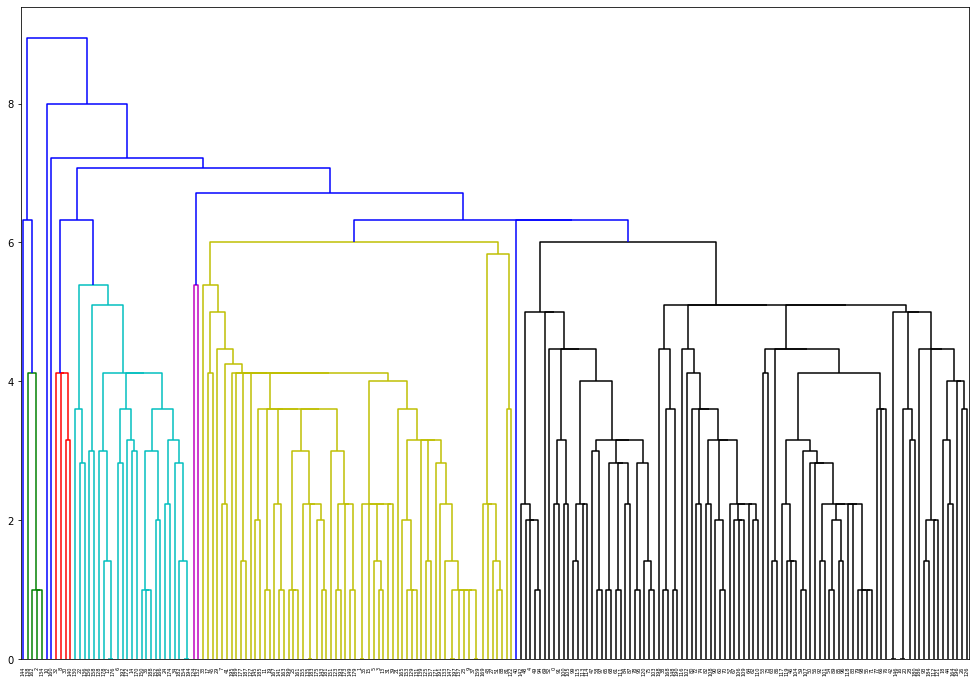

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage


linked = linkage(df, 'single')

labelList = range(0, 200)
plt.figure(figsize=(17, 12))
dendrogram(linked,
            orientation='top',
            labels = labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()